In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from utils import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

2022-12-23 13:14:49.417272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cwd = os.getcwd()

train_path = os.path.join(cwd,'Data','train_val')
test_path  = os.path.join(cwd,'Data','test')

make_dir(train_path)
make_dir(test_path)

In [3]:

#data process
df=pd.read_csv("MCC23.csv")
df.head()

,YEAR,MO,DY,T2M,TS,PRECTOTCORR,PS,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,WS10M,WS50M
0,2001,1,1,9.97,10.75,0.10,74.62,3.45,4.94,0.48,304.13,61.42,86.69,8.47,0.22,1.15,7.75,1.17,1.69
1,2001,1,2,10.38,11.13,0.06,74.77,4.02,5.03,0.55,304.57,71.91,89.66,9.73,0.25,1.34,7.20,1.33,1.85
2,2001,1,3,8.91,10.03,0.01,74.92,3.68,5.34,0.51,295.34,66.46,95.48,9.34,0.24,1.29,6.16,2.36,3.16
3,2001,1,4,9.73,10.58,0.00,74.82,5.16,5.18,0.71,269.09,90.52,91.53,11.73,0.27,1.37,5.98,1.78,2.64
4,2001,1,5,10.63,10.73,0.00,74.72,5.47,5.45,0.75,259.95,97.34,97.74,12.82,0.30,1.48,6.29,2.58,4.03


In [4]:
df.dtypes
df.isnull().sum().sort_values(ascending=False)

YEAR                   0
ALLSKY_SFC_LW_DWN      0
WS10M                  0
QV2M                   0
ALLSKY_SFC_UV_INDEX    0
ALLSKY_SFC_UVB         0
ALLSKY_SFC_UVA         0
CLRSKY_SFC_PAR_TOT     0
ALLSKY_SFC_PAR_TOT     0
ALLSKY_KT              0
MO                     0
CLRSKY_SFC_SW_DWN      0
ALLSKY_SFC_SW_DWN      0
PS                     0
PRECTOTCORR            0
TS                     0
T2M                    0
DY                     0
WS50M                  0
dtype: int64

In [5]:
df.dropna(axis=0, how='any', inplace=False)

,YEAR,MO,DY,T2M,TS,PRECTOTCORR,PS,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,WS10M,WS50M
0,2001,1,1,9.97,10.75,0.10,74.62,3.45,4.94,0.48,304.13,61.42,86.69,8.47,0.22,1.15,7.75,1.17,1.69
1,2001,1,2,10.38,11.13,0.06,74.77,4.02,5.03,0.55,304.57,71.91,89.66,9.73,0.25,1.34,7.20,1.33,1.85
2,2001,1,3,8.91,10.03,0.01,74.92,3.68,5.34,0.51,295.34,66.46,95.48,9.34,0.24,1.29,6.16,2.36,3.16
3,2001,1,4,9.73,10.58,0.00,74.82,5.16,5.18,0.71,269.09,90.52,91.53,11.73,0.27,1.37,5.98,1.78,2.64
4,2001,1,5,10.63,10.73,0.00,74.72,5.47,5.45,0.75,259.95,97.34,97.74,12.82,0.30,1.48,6.29,2.58,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2021,12,27,12.78,10.63,0.00,74.52,5.28,5.44,0.73,251.50,91.89,94.98,12.07,0.30,-999.00,5.43,1.88,2.66
7666,2021,12,28,11.82,10.77,0.00,74.40,5.27,5.43,0.73,269.69,92.97,96.02,12.19,0.30,1.49,6.65,2.41,3.63
7667,2021,12,29,11.66,10.12,0.00,74.48,5.60,5.57,0.77,248.30,98.33,98.23,12.84,0.31,1.59,5.37,2.15,3.11
7668,2021,12,30,12.19,10.62,0.00,74.52,5.66,5.63,0.78,241.05,98.61,98.34,12.85,0.31,1.56,4.94,1.30,1.92


<AxesSubplot:>

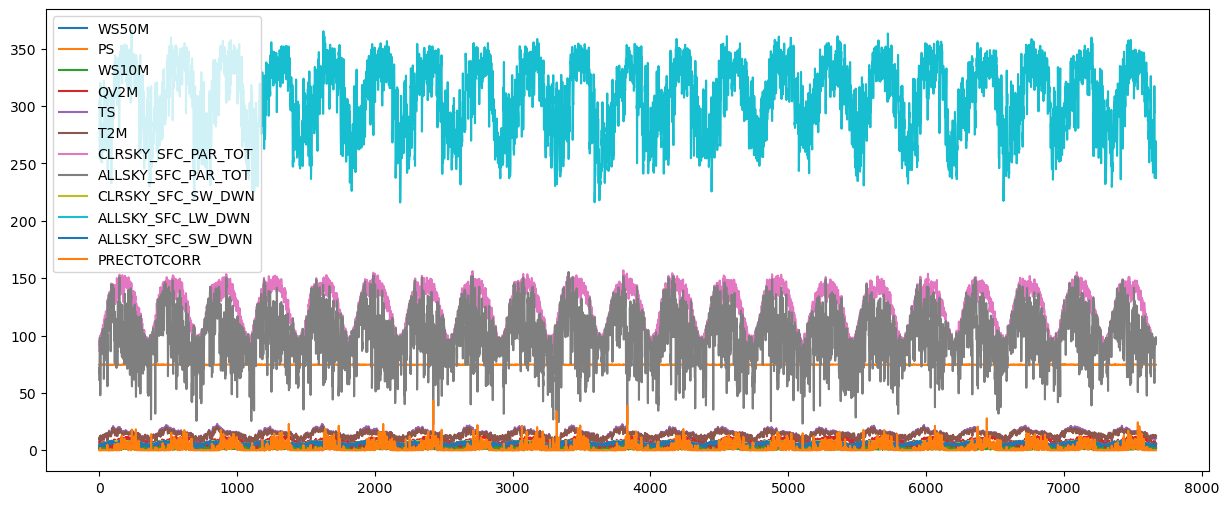

In [6]:
df[['WS50M','PS','WS10M','QV2M','TS','T2M','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_SW_DWN','ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN','PRECTOTCORR']].plot(figsize=(15,6))

In [7]:
#choose relevant variables
X=df[['WS50M','PS','WS10M','QV2M','TS','T2M','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_SW_DWN','ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN']]
Y=df[['PRECTOTCORR']]
print (X,Y)

      WS50M     PS  WS10M  QV2M     TS    T2M  CLRSKY_SFC_PAR_TOT  \
0      1.69  74.62   1.17  7.75  10.75   9.97               86.69   
1      1.85  74.77   1.33  7.20  11.13  10.38               89.66   
2      3.16  74.92   2.36  6.16  10.03   8.91               95.48   
3      2.64  74.82   1.78  5.98  10.58   9.73               91.53   
4      4.03  74.72   2.58  6.29  10.73  10.63               97.74   
...     ...    ...    ...   ...    ...    ...                 ...   
7665   2.66  74.52   1.88  5.43  10.63  12.78               94.98   
7666   3.63  74.40   2.41  6.65  10.77  11.82               96.02   
7667   3.11  74.48   2.15  5.37  10.12  11.66               98.23   
7668   1.92  74.52   1.30  4.94  10.62  12.19               98.34   
7669   2.21  74.51   1.51  5.13  10.64  12.69               97.18   

      ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_SW_DWN  ALLSKY_SFC_LW_DWN  \
0                  61.42               4.94             304.13   
1                  71.91               

In [8]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=10)
X_train.head()

,WS50M,PS,WS10M,QV2M,TS,T2M,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN
2941,3.74,74.75,2.51,6.35,10.30,9.52,101.82,97.16,5.65,276.69,5.43
7289,2.85,74.46,1.71,6.84,12.00,11.80,90.56,78.72,5.13,282.09,4.47
1443,4.77,74.93,3.55,6.35,7.35,6.75,95.33,54.34,5.24,303.95,2.94
3664,2.16,74.74,1.45,5.92,8.80,7.76,99.99,84.68,5.57,285.27,4.74
4291,3.49,74.42,2.12,10.56,14.72,13.98,121.74,79.61,6.70,343.31,4.29


In [9]:
#data normalization
mean, std = X_train.mean(), X_train.std()
mean1,std1= Y_train.mean(), Y_train.std()

X_train_df= (X_train- mean)/std
X_test_df= (X_test- mean)/std
Y_train_df=(Y_train- mean1)/std1

X_train1= X_train_df.to_numpy()
X_test1= X_test_df.to_numpy()
Y_train1=Y_train_df.to_numpy()
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(4602, 11) (4602, 1) (3068, 11) (3068, 1)


In [10]:
X_train_df.head()

,WS50M,PS,WS10M,QV2M,TS,T2M,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN
2941,0.671709,1.112060,0.661888,-0.766317,-1.324008,-1.670553,-1.247787,-0.146537,-1.300871,-0.987655,-0.066886
7289,-0.081175,-0.955611,-0.298445,-0.560842,-0.776769,-0.795644,-1.861382,-0.988166,-1.835505,-0.812242,-0.837417
1443,1.543025,2.395441,1.910322,-0.766317,-2.273628,-2.733490,-1.601449,-2.100905,-1.722409,-0.102146,-2.065451
3664,-0.664871,1.040761,-0.610554,-0.946633,-1.806866,-2.345921,-1.347510,-0.716143,-1.383122,-0.708944,-0.620705
4291,0.460225,-1.240807,0.193726,0.999097,0.098813,0.040891,-0.162282,-0.947545,-0.221321,1.176416,-0.981892


In [11]:
Y_train_df.head()

,PRECTOTCORR
2941,-0.647624
7289,-0.644700
1443,-0.597925
3664,-0.554073
4291,0.273268


In [12]:
#构建NN模型
n_neuron       = 64
activation     = 'relu' 
num_epochs     = 2000
learning_rate  = 0.001
minibatch_size = 64
model_num      = 1

In [13]:
model = Sequential()

model.add(Dense(n_neuron,  activation=activation,input_shape=(X_train.shape[1],)))
model.add(Dense(n_neuron,  activation=activation)) 
model.add(Dense(n_neuron,  activation=activation)) 
model.add(Dense(n_neuron,  activation=activation)) 
model.add(Dense(Y_train.shape[1],  activation='linear')) 


model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

2022-12-23 13:15:00.566103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,162,113
Trainable params: 3,162,113
Non-trainable params: 0
_________________________________________________________________


In [29]:
#tain and save model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


precipitation = model.fit(X_train, Y_train, 
                    batch_size      = minibatch_size,
                    epochs          = num_epochs,
                    validation_split= 0.4, 
                    verbose         = 1,
                    callbacks       = [early_stop])

Epoch 1/2000
44/44 [==============================] - 1s 28ms/step - loss: 3.9770 - val_loss: 4.8454
Epoch 2/2000
44/44 [==============================] - 1s 28ms/step - loss: 3.8826 - val_loss: 5.1710
Epoch 3/2000
44/44 [==============================] - 1s 29ms/step - loss: 3.7770 - val_loss: 4.6142
Epoch 4/2000
44/44 [==============================] - 1s 28ms/step - loss: 3.6614 - val_loss: 4.6041
Epoch 5/2000
44/44 [==============================] - 1s 27ms/step - loss: 3.5984 - val_loss: 4.5135
Epoch 6/2000
44/44 [==============================] - 1s 28ms/step - loss: 3.6050 - val_loss: 4.7066
Epoch 7/2000
44/44 [==============================] - 1s 27ms/step - loss: 3.6212 - val_loss: 4.6302
Epoch 8/2000
44/44 [==============================] - 1s 27ms/step - loss: 3.6251 - val_loss: 5.2739
Epoch 9/2000
44/44 [==============================] - 1s 27ms/step - loss: 3.9964 - val_loss: 4.7432
Epoch 10/2000
44/44 [==============================] - 1s 27ms/step - loss: 3.7356 - val_lo

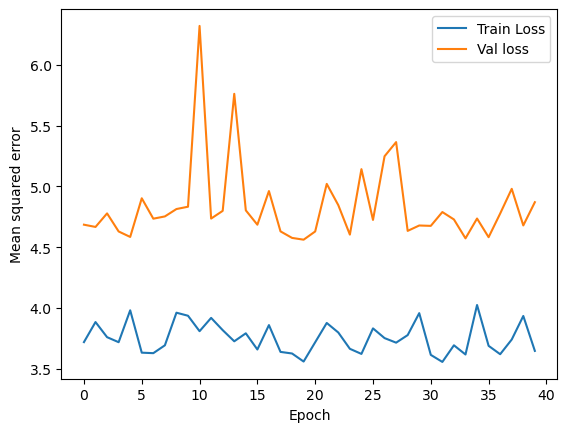

In [28]:
plot_history(precipitation)

In [17]:

model_path = os.path.join(cwd,'saved_model')
make_dir(model_path)

In [18]:

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(os.path.join(model_path,'NN_model.h5'))


In [19]:
#evaluate the model
# reload the saved model
model = load_model(os.path.join(model_path,'NN_model.h5'))

In [20]:
Y_test_pre = model.predict(X_test)
Y_test_pre = Y_test_pre.reshape(Y_test_pre.shape[0], 1)

96/96 [==============================] - 1s 5ms/step


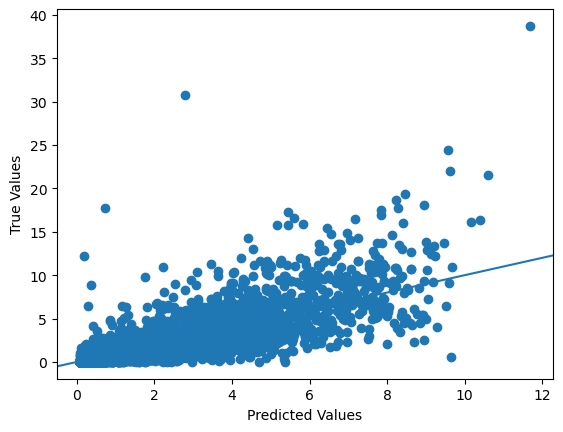

In [21]:
plt.scatter(Y_test_pre, Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])

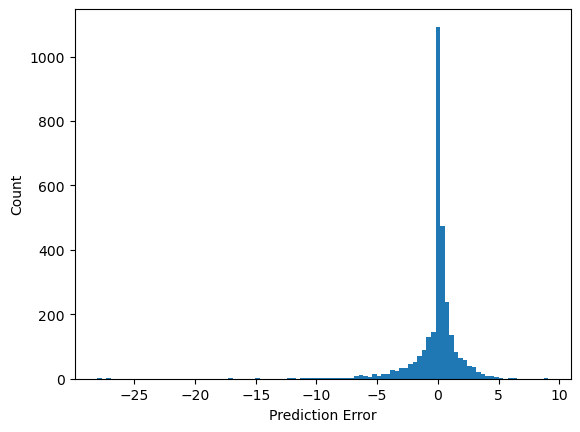

In [22]:
error = Y_test_pre.reshape(3068,1)- Y_test
plt.hist(error,bins = 100)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")

In [23]:
mse = mean_squared_error(Y_test, Y_test_pre)
print(mse)

3.8864171294738297


In [24]:
r2_score(Y_test,Y_test_pre)

0.63710545379343

In [25]:
print('MAE:',metrics.mean_absolute_error(Y_test,Y_test_pre))

MAE: 1.1512794018763386
